In [20]:
# Notebook Fashion Mnist for tensorflow 1.10
# https://www.tensorflow.org/tutorials/keras/basic_classification

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
from IPython.display import Image
print(tf.__version__)


1.11.0


In [21]:
# change of dir for tensorboard logs

path=os.chdir('C:/Users/gonzalo.moreno/Documents/Python_tutorials/fashion MNIST')
os.getcwd()

subfolder='logs_tensorboard-{}'.format(datetime.now().strftime('%Y%m%d-%H%M%S'))
logdir=f'./name_dir_tensorboard/{subfolder}/'
tensorboard=TensorBoard(logdir)

In [2]:
#Extracting data

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_labels[5]

2

Preprocessing of Data

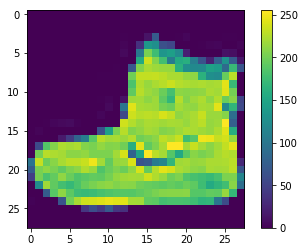

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)


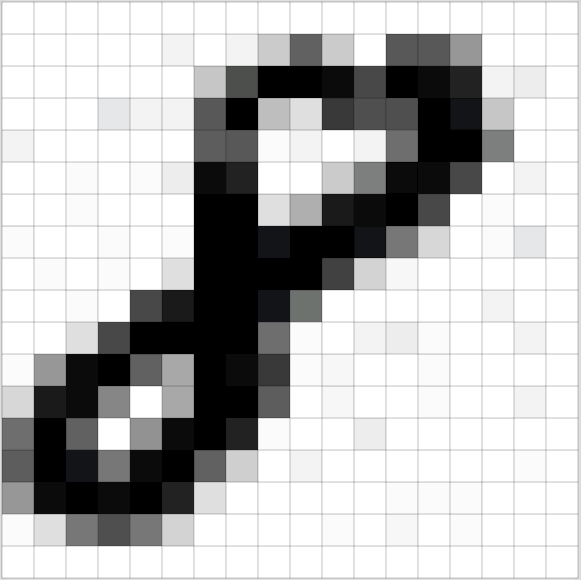

In [6]:

Image(filename='C:/Users/gonzalo.moreno/Documents/Python_tutorials/img/number-eight-image-classification.gif')



We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, cast the datatype of the image components from an integer to a float, and divide by 255. Here's the function to preprocess the images:

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0


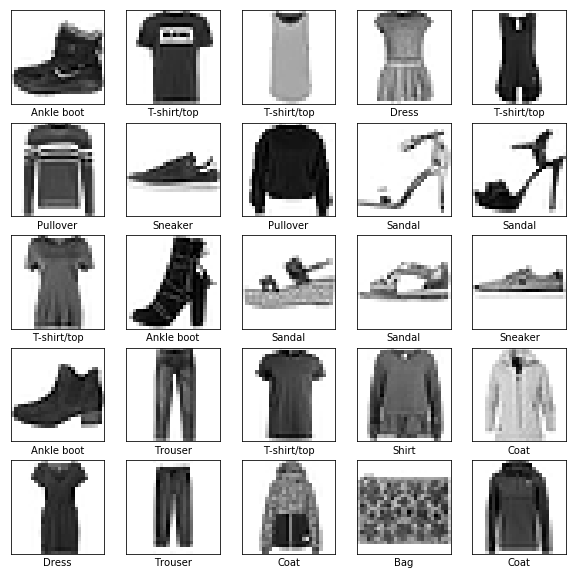

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])


Building the model

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [ ]:
# hyperparameters to tune

dense_layers=[0,1,2]
layer_sizes=[12,32,64,128]
conv_layers=[1,2,3]


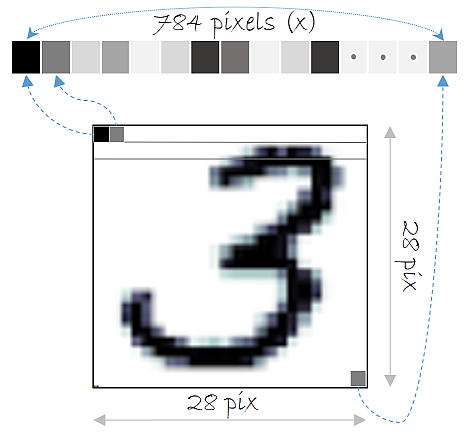

In [20]:

Image(filename='C:/Users/gonzalo.moreno/Documents/Python_tutorials/img/MNIST_input.png')


After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

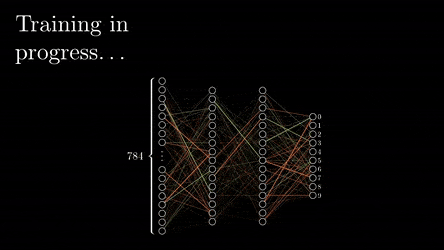

In [10]:

Image(filename='C:/Users/gonzalo.moreno/Documents/Python_tutorials/img/MiniatureDependentCob-max-1mb.gif',width=900)



In [11]:
# final Settings before training
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
#training
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.4958 - acc: 0.8253
Epoch 2/10
60000/60000 [==============================] - 5s 92us/step - loss: 0.3729 - acc: 0.8648
Epoch 3/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.3373 - acc: 0.8771
Epoch 4/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.3133 - acc: 0.8851
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2940 - acc: 0.8922
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.2781 - acc: 0.8972
Epoch 7/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.2670 - acc: 0.9011
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.2573 - acc: 0.9043
Epoch 9/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.2466 - acc: 0.9090
Epoch 10/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.2379 - acc: 0.9115

In [24]:
#Evaluation Accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 40us/step
Test accuracy: 0.8843


In [25]:
predictions = model.predict(test_images)
predictions[0]

array([8.8632990e-10, 4.7159126e-08, 1.2097855e-10, 7.7935177e-08,
       5.2296412e-10, 3.4393521e-04, 4.2335523e-07, 1.0406765e-02,
       7.6824726e-08, 9.8924863e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])


9

In [28]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


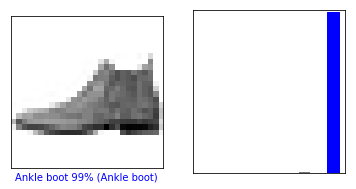

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


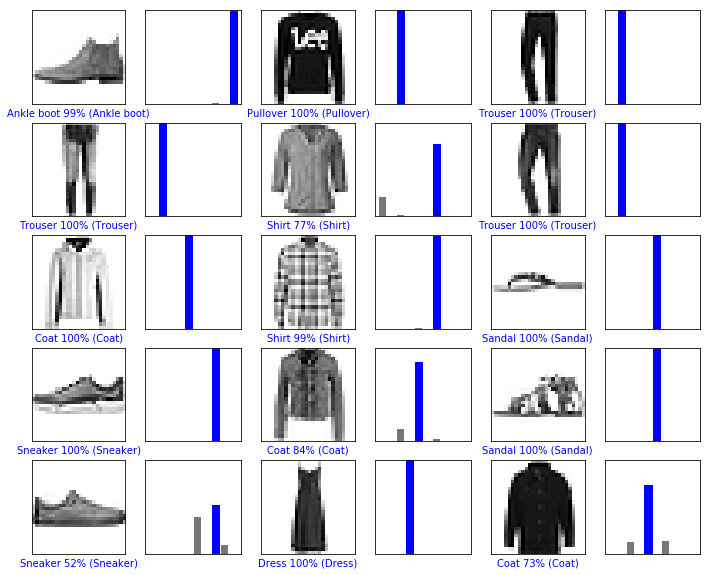

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
